{'python': 21, 'javascript': 12, 'ruby': 6, 'java': 7, 'rust': 9, 'c#': 4, 'php': 2, 'node.js': 1}


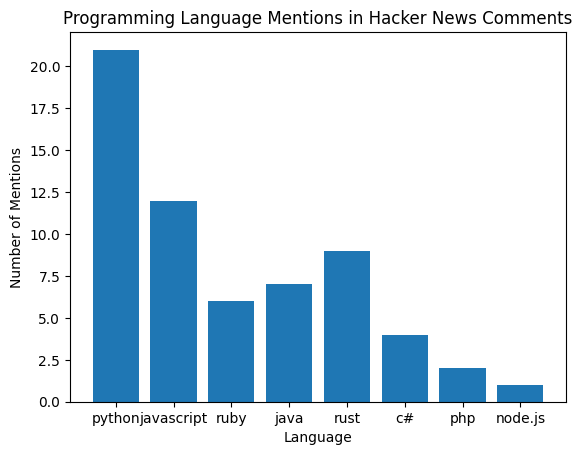

In [11]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

def main():
    url = "https://news.ycombinator.com/item?id=39217310"
    response = requests.get(url)

    #use these statements to check the http requests result
    # print(f"Scraping: {url}")
    # print(response)
    # print(response.content)
    soup = BeautifulSoup(response.content, "html.parser")
    elements = soup.find_all(class_="ind", indent=0)
    comments = [e.find_next(class_="comment") for e in elements]

    keywords = {"python": 0, "javascript": 0, "ruby": 0, "java": 0, "rust": 0, "c#": 0, "php": 0, "node.js": 0}

    # cleaning the data
    for comment in comments:
        comment_text = comment.get_text().lower()
        words = comment_text.split(" ")
        words = [w.strip(".,/:;!@") for w in words]

        #frequency of each language
        for k in keywords:
            if k in words:
                keywords[k] += 1

    print(keywords)

    #frequency visualized
    plt.bar(keywords.keys(), keywords.values())
    plt.xlabel("Language")
    plt.ylabel("Number of Mentions")
    plt.title("Programming Language Mentions in Hacker News Comments")
    plt.show()

if __name__ == "__main__":
    main()



---

**Introduction:**

In the realm of technology and software development, staying abreast of programming language trends is crucial. The landscape is dynamic, with languages gaining and losing prominence based on evolving industry needs. In this analysis, we explore the programming language trends as reflected in the comments section of a popular technology community, Hacker News.

**Data Collection:**

Using web scraping techniques, we gathered insights from the comments on a Hacker News thread "https://news.ycombinator.com/item?id=39217310". The comments, known for their diversity and depth, provide a valuable source for understanding the preferences and discussions around programming languages.

**Keyword Analysis:**

Our analysis focused on identifying mentions of specific programming languages within the comments. The languages considered include Python, JavaScript, Ruby, Java, Rust, C#, PHP, and Node.js. We utilized a Python script with the BeautifulSoup library to extract and process the textual content from the comments.

```python
for comment in comments:
    comment_text = comment.get_text().lower()
    words = comment_text.split(" ")
    words = [w.strip(".,/:;!@") for w in words]

    for k in keywords:
        if k in words:
            keywords[k] += 1
```

**Results:**

The resulting data provides a snapshot of the relative mentions of each programming language within the Hacker News comments. The keyword counts were visualized using a bar chart, offering a clear representation of language popularity.

```python
plt.bar(keywords.keys(), keywords.values())
plt.xlabel("Language")
plt.ylabel("# of Mentions")
plt.show()
```

**Key Observations:**

- Python emerges as a dominant force, reflecting its widespread adoption in various domains.
- JavaScript, a cornerstone of web development, maintains a strong presence.
- The popularity of languages like Rust and Node.js suggests a growing interest in performance and server-side JavaScript, respectively.

**Implications:**

Understanding these trends can inform developers, businesses, and educators. Developers may choose languages based on community support and emerging opportunities, while businesses can align technology stacks with prevailing industry preferences. Educators can adapt curricula to meet the demands of the evolving tech landscape.

**Conclusion:**

By delving into the discourse within the Hacker News community, we gain valuable insights into the ebb and flow of programming language trends. This analysis serves as a microcosm, offering a glimpse into the larger narrative of technological evolution and the languages that shape our digital world.